<a href="https://colab.research.google.com/github/yakimsanik/belhard/blob/master/Yakim_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns



In [13]:
# применим функцию read_csv() и посмотрим на первые  записи
train = pd.read_csv('/content/drive/MyDrive/Project/Data Science/HW2/vgsales.csv')
train.head(10)

,Unnamed: 0,rank,title,fullTitle,year,crew,imDbRating,imDbRating.1
0,0,1,The Shawshank Redemption,The Shawshank Redemption (1994),1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.2,9.2
1,1,2,The Godfather,The Godfather (1972),1972,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.2,9.2
2,2,3,The Dark Knight,The Dark Knight (2008),2008,"Christopher Nolan (dir.), Christian Bale, Heat...",9.0,9.0
3,3,4,The Godfather Part II,The Godfather Part II (1974),1974,"Francis Ford Coppola (dir.), Al Pacino, Robert...",9.0,9.0
4,4,5,12 Angry Men,12 Angry Men (1957),1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",9.0,9.0
5,5,6,Schindler's List,Schindler's List (1993),1993,"Steven Spielberg (dir.), Liam Neeson, Ralph Fi...",8.9,8.9
6,6,7,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King ...,2003,"Peter Jackson (dir.), Elijah Wood, Viggo Morte...",8.9,8.9
7,7,8,Pulp Fiction,Pulp Fiction (1994),1994,"Quentin Tarantino (dir.), John Travolta, Uma T...",8.8,8.8
8,8,9,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the R...,2001,"Peter Jackson (dir.), Elijah Wood, Ian McKellen",8.8,8.8
9,9,10,"The Good, the Bad and the Ugly","The Good, the Bad and the Ugly (1966)",1966,"Sergio Leone (dir.), Clint Eastwood, Eli Wallach",8.8,8.8


In [17]:
df = pd.read_csv('/content/drive/MyDrive/Project/Data Science/HW2/vgsales.csv')
print(df)


     Unnamed: 0  rank                     title  \
0             0     1  The Shawshank Redemption   
1             1     2             The Godfather   
2             2     3           The Dark Knight   
3             3     4     The Godfather Part II   
4             4     5              12 Angry Men   
..          ...   ...                       ...   
245         245   246               Dersu Uzala   
246         246   247                  The Help   
247         247   248                   Aladdin   
248         248   249                    Gandhi   
249         249   250        Dances with Wolves   

                           fullTitle  year  \
0    The Shawshank Redemption (1994)  1994   
1               The Godfather (1972)  1972   
2             The Dark Knight (2008)  2008   
3       The Godfather Part II (1974)  1974   
4                12 Angry Men (1957)  1957   
..                               ...   ...   
245               Dersu Uzala (1975)  1975   
246                

In [19]:
# Загрузка данных
file_path = "/content/drive/MyDrive/Project/Data Science/HW2/vgsales.csv"  # укажите путь к вашему CSV-файлу
df = pd.read_csv(file_path)

# Вывод первых 5 строк
print(df.head())

   Unnamed: 0  rank                     title  \
0           0     1  The Shawshank Redemption   
1           1     2             The Godfather   
2           2     3           The Dark Knight   
3           3     4     The Godfather Part II   
4           4     5              12 Angry Men   

                         fullTitle  year  \
0  The Shawshank Redemption (1994)  1994   
1             The Godfather (1972)  1972   
2           The Dark Knight (2008)  2008   
3     The Godfather Part II (1974)  1974   
4              12 Angry Men (1957)  1957   

                                                crew  imDbRating  imDbRating.1  
0  Frank Darabont (dir.), Tim Robbins, Morgan Fre...         9.2           9.2  
1  Francis Ford Coppola (dir.), Marlon Brando, Al...         9.2           9.2  
2  Christopher Nolan (dir.), Christian Bale, Heat...         9.0           9.0  
3  Francis Ford Coppola (dir.), Al Pacino, Robert...         9.0           9.0  
4      Sidney Lumet (dir.), Henry F

## предобработка данных

In [20]:
def load_csv(file_path: str) -> pd.DataFrame:
    """Загрузка данных из CSV-файла."""
    return pd.read_csv(file_path)


In [21]:
def check_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """Проверка на пропущенные значения."""
    return df.isnull().sum()


In [22]:
# Проверка пропущенных значений
missing_values = check_missing_values(df)
# Вывод результата
print(missing_values)

Unnamed: 0      0
rank            0
title           0
fullTitle       0
year            0
crew            0
imDbRating      0
imDbRating.1    0
dtype: int64


In [23]:
def fill_missing(df: pd.DataFrame, strategy: str = 'mean', value=None) -> pd.DataFrame:
    """Заполнение пропущенных значений."""
    if strategy == 'mean':
        return df.fillna(df.mean())
    elif strategy == 'median':
        return df.fillna(df.median())
    elif strategy == 'value' and value is not None:
        return df.fillna(value)
    else:
        return df


In [24]:
def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    """Удаление дубликатов."""
    return df.drop_duplicates()


In [25]:
def normalize_data(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """Нормализация данных (Min-Max)."""
    for col in columns:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df

def convert_to_datetime(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """Конвертация столбцов в datetime."""
    for col in columns:
        df[col] = pd.to_datetime(df[col])
    return df

# визуализация из файла data_visualization.py

In [3]:
%cd sample_data

/content/sample_data


In [4]:
!ls

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [26]:
from google.colab import files
import pandas as pd



df = pd.read_csv('/content/drive/MyDrive/Project/Data Science/HW2/vgsales.csv')

In [34]:
!pip install matplotlib seaborn pandas

In [79]:
!cp /content/drive/MyDrive/Project/Data\ Science/HW2/data_visualization.py /content

In [82]:
!ls

anscombe.json		     california_housing_train.csv  mnist_test.csv	  __pycache__
california_housing_test.csv  data_visualization.py	   mnist_train_small.csv  README.md


In [84]:
import pandas as pd
from data_visualization import DataVisualizer

# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Project/Data Science/HW2/vgsales.csv')  # Файл должен быть загружен в Colab
print(df.head())

# Инициализация визуализатора
visualizer = DataVisualizer(df)

   Unnamed: 0  rank                     title  \
0           0     1  The Shawshank Redemption   
1           1     2             The Godfather   
2           2     3           The Dark Knight   
3           3     4     The Godfather Part II   
4           4     5              12 Angry Men   

                         fullTitle  year  \
0  The Shawshank Redemption (1994)  1994   
1             The Godfather (1972)  1972   
2           The Dark Knight (2008)  2008   
3     The Godfather Part II (1974)  1974   
4              12 Angry Men (1957)  1957   

                                                crew  imDbRating  imDbRating.1  
0  Frank Darabont (dir.), Tim Robbins, Morgan Fre...         9.2           9.2  
1  Francis Ford Coppola (dir.), Marlon Brando, Al...         9.2           9.2  
2  Christopher Nolan (dir.), Christian Bale, Heat...         9.0           9.0  
3  Francis Ford Coppola (dir.), Al Pacino, Robert...         9.0           9.0  
4      Sidney Lumet (dir.), Henry F

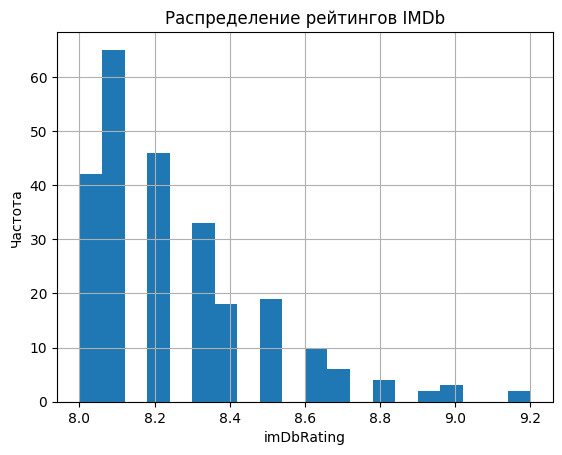

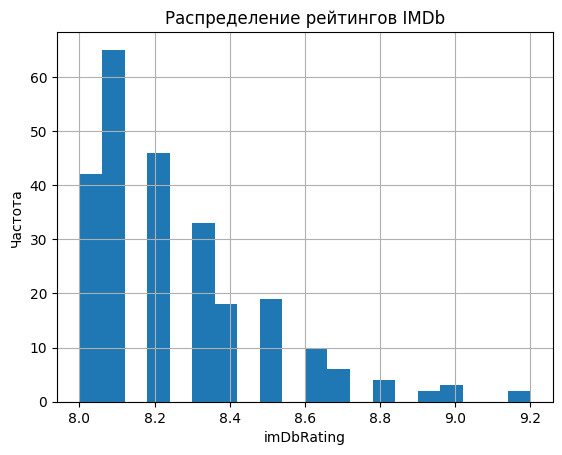

In [74]:
visualizer.add_histogram('imDbRating', bins=20, title='Распределение рейтингов IMDb')

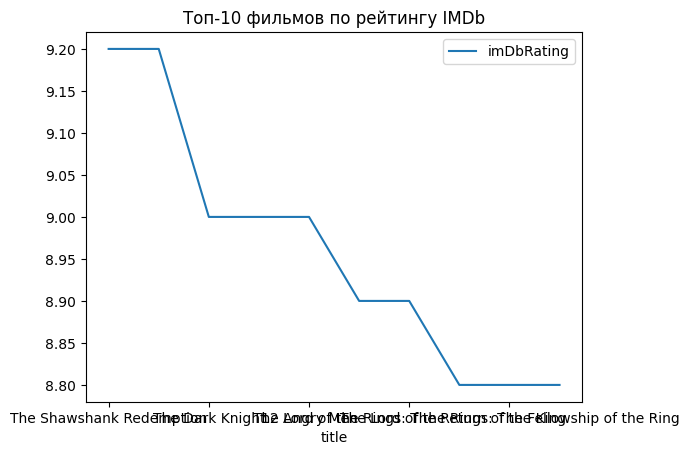

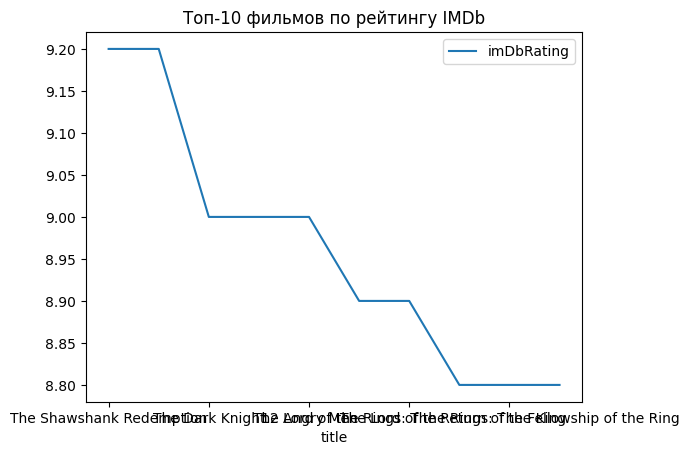

In [61]:
# Сортируем по рейтингу и берем топ-10
top_movies = df.sort_values('imDbRating', ascending=False).head(10)

# Линейный график для топ-10
visualizer_line = DataVisualizer(top_movies)
visualizer_line.add_line_plot('title', 'imDbRating', title='Топ-10 фильмов по рейтингу IMDb')